In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout

In [2]:
tr_df = pd.read_csv('DailyData.csv')

In [3]:
tr_df.head()

campaign name        date  clicks  impressions  \
0  SHOPTIMISED PMax-46 - all products-M  2023-11-28       0           33   
1  SHOPTIMISED PMax-46 - all products-M  2023-11-29      11         1139   
2  SHOPTIMISED PMax-46 - all products-M  2023-11-30       7          655   
3  SHOPTIMISED PMax-46 - all products-M  2023-12-01       5          684   
4  SHOPTIMISED PMax-46 - all products-M  2023-12-02      43         3792   

   cost_micros      bidding_strategy_type  conversions  cost_per_conversion  \
0            0  MAXIMIZE_CONVERSION_VALUE     0.000000                  NaN   
1      4060000  MAXIMIZE_CONVERSION_VALUE     1.000000          4060000.000   
2      1430000  MAXIMIZE_CONVERSION_VALUE     0.000000                  NaN   
3      2640000  MAXIMIZE_CONVERSION_VALUE     0.000000                  NaN   
4     10510000  MAXIMIZE_CONVERSION_VALUE     3.332276          3154000.449   

   Click-through rate (CTR)  average cost per click (CPC)  \
0                  0.000000                      0.000000   
1                  0.965759                      0.369091   
2                  1.068702                      0.204286   
3                  0.730994                      0.528000   
4                  1.133966                      0.244419   

   cost-per-acquisition (CPA)   Cost  conversion per euro  
0                    0.000000   0.00             0.000000  
1                    4.060000   4.06             0.246305  
2                    4.085714   1.43             0.000000  
3                   10.560000   2.64             0.000000  
4                    3.154000  10.51             0.317058

In [4]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   campaign name                 176 non-null    object 
 1   date                          176 non-null    object 
 2   clicks                        176 non-null    int64  
 3   impressions                   176 non-null    int64  
 4   cost_micros                   176 non-null    int64  
 5   bidding_strategy_type         176 non-null    object 
 6   conversions                   176 non-null    float64
 7   cost_per_conversion           170 non-null    float64
 8   Click-through rate (CTR)      176 non-null    float64
 9   average cost per click (CPC)  176 non-null    float64
 10  cost-per-acquisition (CPA)    176 non-null    float64
 11  Cost                          176 non-null    float64
 12  conversion per euro           176 non-null    float64
dtypes: fl

In [5]:
tr_df['date'] = pd.to_datetime(tr_df['date'])

In [6]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   campaign name                 176 non-null    object        
 1   date                          176 non-null    datetime64[ns]
 2   clicks                        176 non-null    int64         
 3   impressions                   176 non-null    int64         
 4   cost_micros                   176 non-null    int64         
 5   bidding_strategy_type         176 non-null    object        
 6   conversions                   176 non-null    float64       
 7   cost_per_conversion           170 non-null    float64       
 8   Click-through rate (CTR)      176 non-null    float64       
 9   average cost per click (CPC)  176 non-null    float64       
 10  cost-per-acquisition (CPA)    176 non-null    float64       
 11  Cost                          17

In [7]:
tr_df.set_index('date', inplace= True)

In [8]:
tr_df.head()

campaign name  clicks  impressions  \
date                                                                    
2023-11-28  SHOPTIMISED PMax-46 - all products-M       0           33   
2023-11-29  SHOPTIMISED PMax-46 - all products-M      11         1139   
2023-11-30  SHOPTIMISED PMax-46 - all products-M       7          655   
2023-12-01  SHOPTIMISED PMax-46 - all products-M       5          684   
2023-12-02  SHOPTIMISED PMax-46 - all products-M      43         3792   

            cost_micros      bidding_strategy_type  conversions  \
date                                                              
2023-11-28            0  MAXIMIZE_CONVERSION_VALUE     0.000000   
2023-11-29      4060000  MAXIMIZE_CONVERSION_VALUE     1.000000   
2023-11-30      1430000  MAXIMIZE_CONVERSION_VALUE     0.000000   
2023-12-01      2640000  MAXIMIZE_CONVERSION_VALUE     0.000000   
2023-12-02     10510000  MAXIMIZE_CONVERSION_VALUE     3.332276   

            cost_per_conversion  Click-through rate (CTR)  \
date                                                        
2023-11-28                  NaN                  0.000000   
2023-11-29          4060000.000                  0.965759   
2023-11-30                  NaN                  1.068702   
2023-12-01                  NaN                  0.730994   
2023-12-02          3154000.449                  1.133966   

            average cost per click (CPC)  cost-per-acquisition (CPA)   Cost  \
date                                                                          
2023-11-28                      0.000000                    0.000000   0.00   
2023-11-29                      0.369091                    4.060000   4.06   
2023-11-30                      0.204286                    4.085714   1.43   
2023-12-01                      0.528000                   10.560000   2.64   
2023-12-02                      0.244419                    3.154000  10.51   

            conversion per euro  
date                             
2023-11-28             0.000000  
2023-11-29             0.246305  
2023-11-30             0.000000  
2023-12-01             0.000000  
2023-12-02             0.317058

# conversions Trend

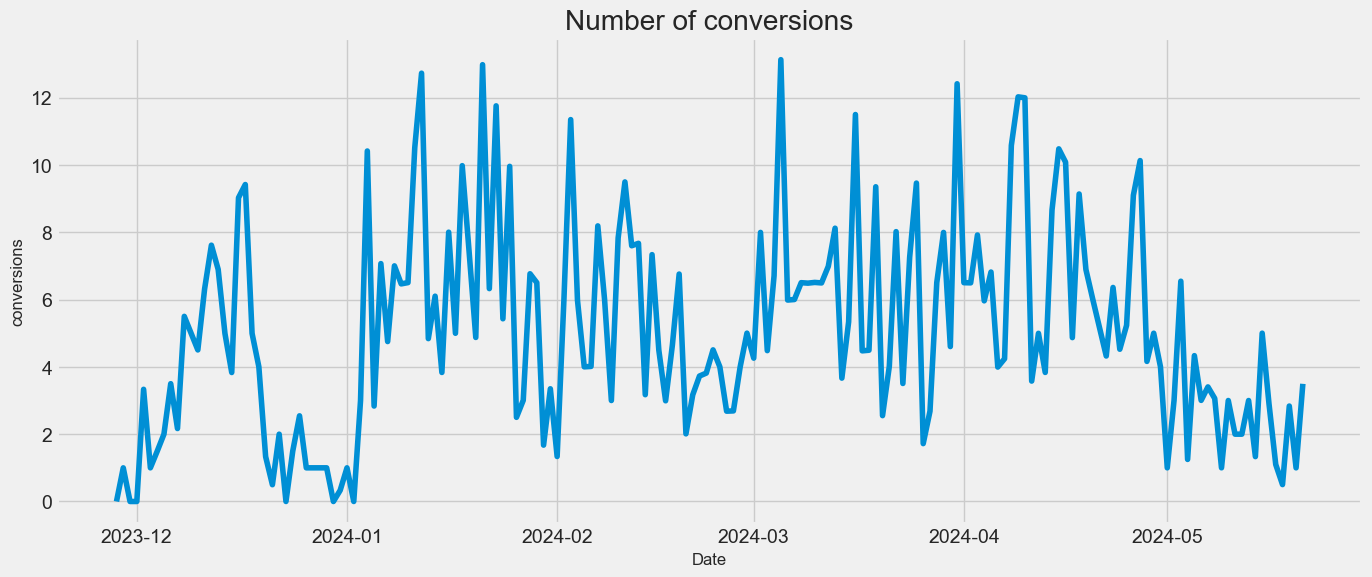

In [9]:
plt.figure(figsize = (15, 6))
plt.plot(tr_df.index, tr_df['conversions'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('conversions', {'fontsize': 12})
plt.title('Number of conversions')
plt.show()

In [10]:
n_cols = 1
conversionsdataset = tr_df['conversions']
conversionsdataset = pd.DataFrame(conversionsdataset)
conversionsdata = conversionsdataset.values

conversionsdata.shape

(176, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
conversions_scaled_data = scaler.fit_transform(np.array(conversionsdata))

In [12]:
train_size = int(len(conversionsdata) * 0.80)
test_size = len(conversionsdata) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 140 Test Size : 36


In [13]:
train_data = conversions_scaled_data[0:train_size, :]
train_data.shape

(140, 1)

In [14]:
# Creating a Training set with 60 time-steps and 1 target
x_train = []
y_train = []
time_steps = 30
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.        ],
       [0.07619048],
       [0.        ],
       [0.        ],
       [0.2538877 ],
       [0.07619048],
       [0.1134851 ],
       [0.15238095],
       [0.26666667],
       [0.16507939],
       [0.41904762],
       [0.38095238],
       [0.34303802],
       [0.48120663],
       [0.58013173],
       [0.52528731],
       [0.38021272],
       [0.29191566],
       [0.68748846],
       [0.7174029 ],
       [0.38050842],
       [0.30496373],
       [0.10158735],
       [0.03794728],
       [0.15238095],
       [0.        ],
       [0.11407383],
       [0.19393943],
       [0.07619048],
       [0.07619048]])]
y_train: [array([0.07619048])]


In [15]:
len(x_train)

110

In [16]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [18]:
x_train.shape , y_train.shape

((110, 30, 1), (110, 1))

In [19]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics=['mean_absolute_error'])

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 300, batch_size= 16 , callbacks= callbacks )

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.2067 - mean_absolute_error: 0.3679
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0605 - mean_absolute_error: 0.2075
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0515 - mean_absolute_error: 0.1700
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0573 - mean_absolute_error: 0.1951
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0563 - mean_absolute_error: 0.1921
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0475 - mean_absolute_error: 0.1769
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.1823
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.1672
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.1675
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.1636
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/ste

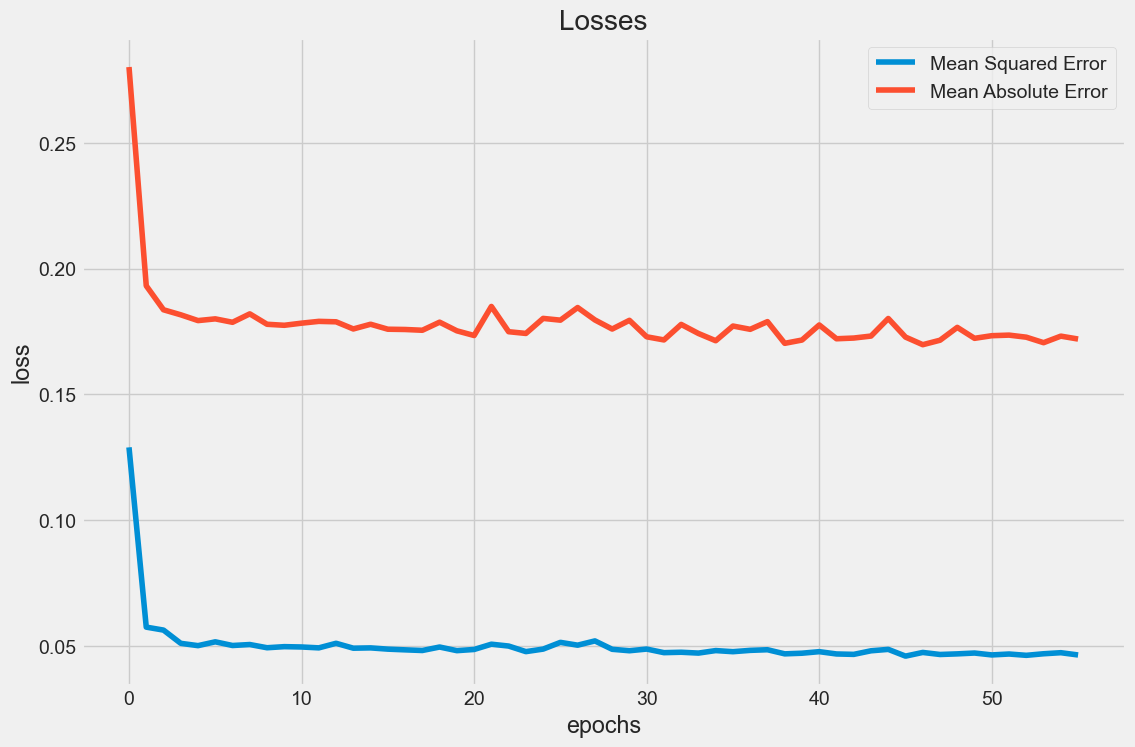

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 30
test_data = conversions_scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [24]:
x_test.shape , y_test.shape

((36, 30, 1), (36, 1))

In [25]:
predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step


In [26]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(36, 1)

In [27]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.77

In [42]:
preds_acts = pd.DataFrame(data={'Predicted conversions':predictions.flatten(), 'Actual conversions':y_test.flatten()})
preds_acts

Predicted conversions  Actual conversions
0                5.986766           10.079527
1                6.207635            4.868349
2                6.169028            9.134768
3                6.210031            6.891433
4                6.208436            6.016440
5                6.097126            5.166667
6                5.863034            4.321665
7                5.563866            6.358181
8                5.345373            4.522599
9                5.093373            5.234060
10               4.946280            9.095239
11               5.092568           10.127772
12               5.457277            4.161246
13               5.565380            4.998920
14               5.588218            4.000000
15               5.440929            1.000000
16               5.081638            3.002452
17               4.730548            6.543285
18               4.640011            1.250000
19               4.411937            4.333333
20               4.314105            3.004196
21               4.250983            3.404269
22               4.239252            3.061707
23               4.214260            1.000000
24               4.078935            3.000000
25               4.030674            2.000000
26               4.031660            2.000000
27               4.029238            3.000000
28               4.108852            1.333334
29               4.098417            5.000000
30               4.283581            2.915050
31               4.447846            1.100247
32               4.497102            0.501860
33               4.387715            2.835140
34               4.370423            1.000000
35               4.289372            3.495456

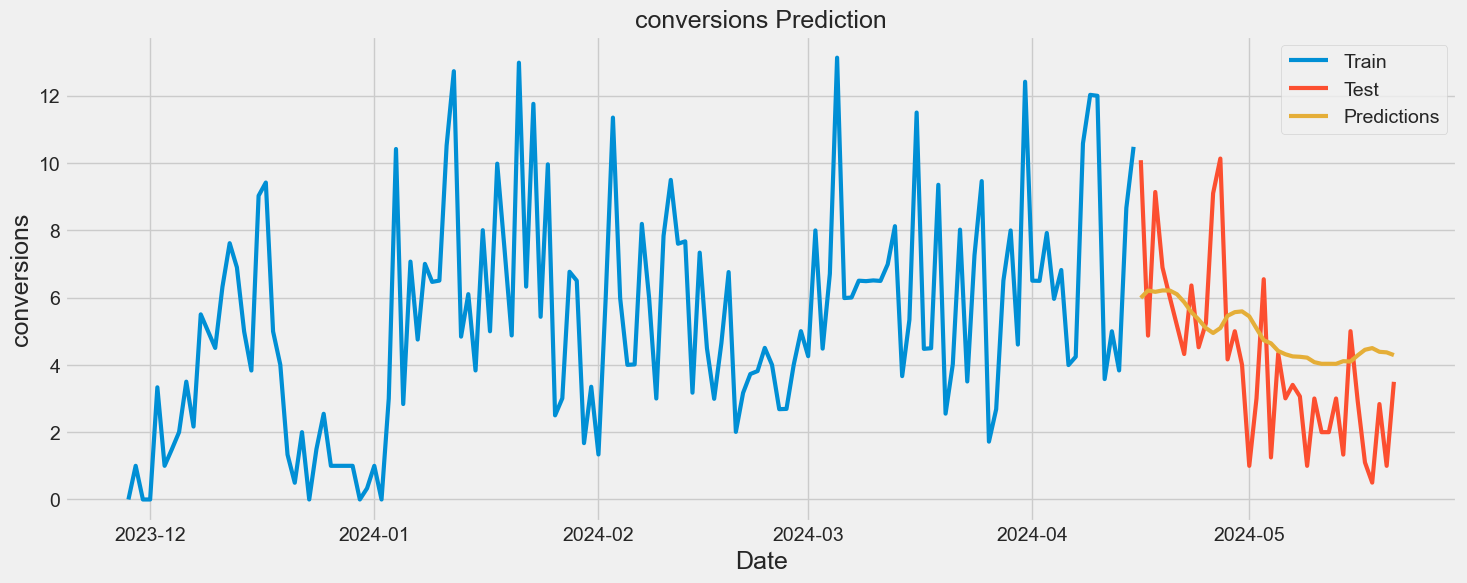

In [29]:
train = conversionsdataset.iloc[:train_size , 0:1]
test = conversionsdataset.iloc[train_size: , 0:1]
test['Predicted conversions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('conversions Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('conversions', fontsize= 18)
plt.plot(train['conversions'], linewidth= 3)
plt.plot(test['conversions'], linewidth= 3)
plt.plot(test["Predicted conversions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

## Forecast Next 30 Days

In [30]:
from datetime import timedelta

In [31]:
def insert_end(Xin, new_input):
    timestep = 30
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [32]:
future = 15*2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(conversionsdataset.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[0.32680938]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.32680938, 0.33446127]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.32680938, 0.33446127, 0.3502925]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323, 0.41084948]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323, 0.41084948, 0.4278688]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323, 0.41084948, 0.4278688, 0.44212794]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323, 0.41084948, 0.4278688, 0.44212794, 0.45599738]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.32680938, 0.33446127, 0.3502925, 0.3692484, 0.39046323, 0.41084948, 0.4278688, 0.442

In [33]:
time

[Timestamp('2024-05-21 00:00:00'),
 Timestamp('2024-05-22 00:00:00'),
 Timestamp('2024-05-23 00:00:00'),
 Timestamp('2024-05-24 00:00:00'),
 Timestamp('2024-05-25 00:00:00'),
 Timestamp('2024-05-26 00:00:00'),
 Timestamp('2024-05-27 00:00:00'),
 Timestamp('2024-05-28 00:00:00'),
 Timestamp('2024-05-29 00:00:00'),
 Timestamp('2024-05-30 00:00:00'),
 Timestamp('2024-05-31 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-06-02 00:00:00'),
 Timestamp('2024-06-03 00:00:00'),
 Timestamp('2024-06-04 00:00:00'),
 Timestamp('2024-06-05 00:00:00'),
 Timestamp('2024-06-06 00:00:00'),
 Timestamp('2024-06-07 00:00:00'),
 Timestamp('2024-06-08 00:00:00'),
 Timestamp('2024-06-09 00:00:00'),
 Timestamp('2024-06-10 00:00:00'),
 Timestamp('2024-06-11 00:00:00'),
 Timestamp('2024-06-12 00:00:00'),
 Timestamp('2024-06-13 00:00:00'),
 Timestamp('2024-06-14 00:00:00'),
 Timestamp('2024-06-15 00:00:00'),
 Timestamp('2024-06-16 00:00:00'),
 Timestamp('2024-06-17 00:00:00'),
 Timestamp('2024-06-

In [34]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [35]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

In [36]:
df_result

Date  Forecasted
0  2024-05-21    4.289373
1  2024-05-22    4.389804
2  2024-05-23    4.597589
3  2024-05-24    4.846385
4  2024-05-25    5.124830
5  2024-05-26    5.392399
6  2024-05-27    5.615778
7  2024-05-28    5.802929
8  2024-05-29    5.984966
9  2024-05-30    6.116135
10 2024-05-31    6.207211
11 2024-06-01    6.269657
12 2024-06-02    6.278384
13 2024-06-03    6.232191
14 2024-06-04    6.184888
15 2024-06-05    6.094016
16 2024-06-06    5.991159
17 2024-06-07    5.872109
18 2024-06-08    5.746846
19 2024-06-09    5.629331
20 2024-06-10    5.502426
21 2024-06-11    5.387783
22 2024-06-12    5.283284
23 2024-06-13    5.187031
24 2024-06-14    5.115899
25 2024-06-15    5.042645
26 2024-06-16    5.000700
27 2024-06-17    4.986805
28 2024-06-18    4.992890
29 2024-06-19    5.002232

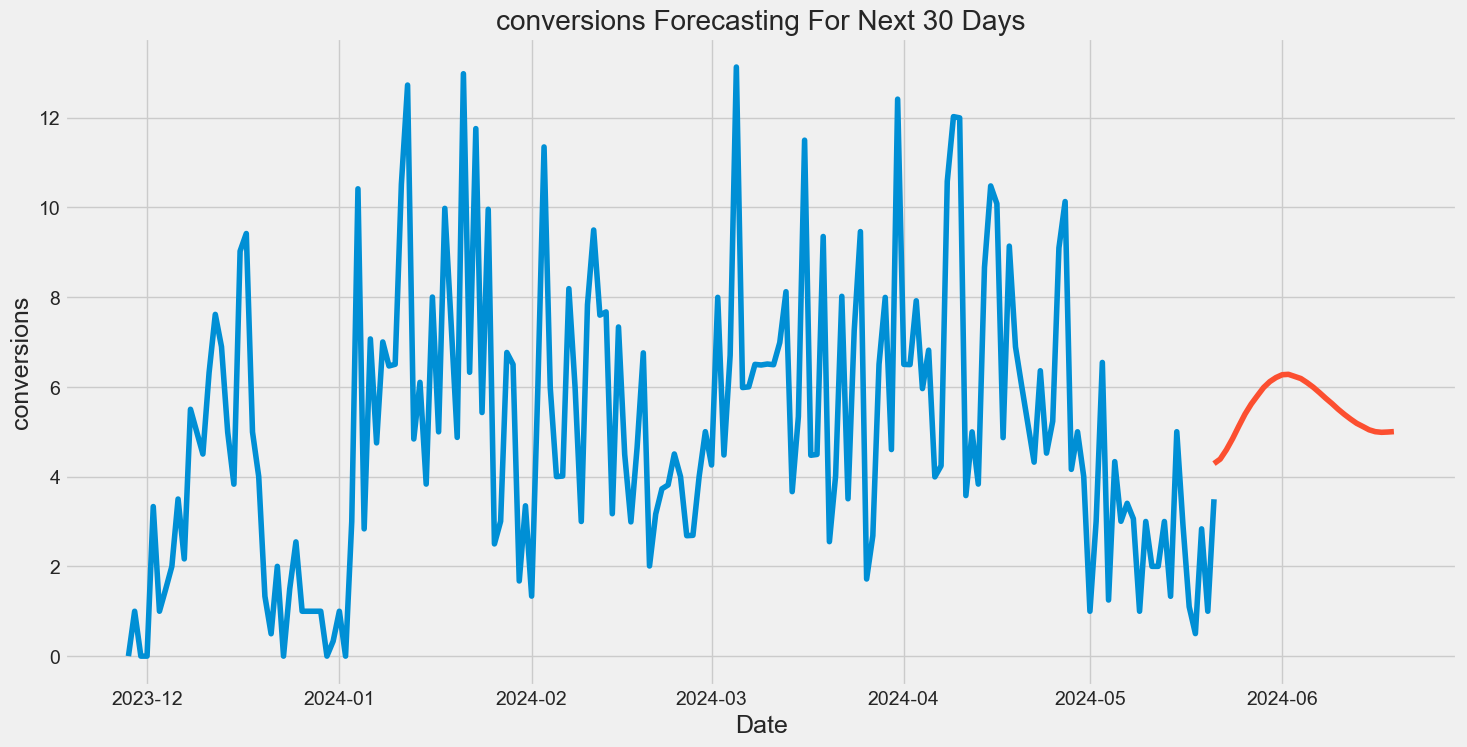

In [39]:
plt.figure(figsize=(16,8))
plt.title('conversions Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('conversions' ,fontsize=18)
plt.plot(conversionsdataset['conversions'])
plt.plot(df_result.set_index('Date')[['Forecasted']])